NLP with NLTK: Text Analysis of Emma by Jane Austen

Introduction

In this notebook, I use Natural Language Processing (NLP) techniques with the NLTK library to analyze the text of Emma by Jane Austen. My goal is to explore key NLP tasks such as tokenization, frequency distribution, bigram collocations, part-of-speech (POS) tagging, and named entity recognition (NER).

Objective:

Tokenize the text into words and sentences.
Analyze word frequencies and find common collocations.
Preprocess the text by removing stopwords and punctuation.
Perform POS tagging and Named Entity Recognition (NER).
1. Installing and Importing NLTK

I first install and import the necessary libraries and datasets from NLTK. This includes downloading the Gutenberg corpus (which contains the text of Emma) along with other NLTK resources like stopwords and tagging tools.# Install and Import NLTK
!pip install nltk
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


In [1]:
# Install and Import NLTK
!pip install nltk
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


I then download all the necessary datasets:

In [2]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Error loading gutenberg: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>
[nltk_data] Error loading maxent_ne_chunker: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading words: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

2. Loading the Text

Next, I load the text of Emma from the NLTK Gutenberg corpus and display the first few sentences and words to better understand the data.

In [3]:
# Load a Text from the Gutenberg Project
emma_text = gutenberg.raw('austen-emma.txt')

# Tokenization into words and sentences
words = word_tokenize(emma_text)
sentences = sent_tokenize(emma_text)

# Display the first few sentences and words to understand the data
print("First 5 sentences:", sentences[:5])
print("First 20 words:", words[:20])


First 5 sentences: ['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.']
First 20 words: ['[', 'Emma', 'by', 'Jane

3. Frequency Distribution

I calculate the frequency distribution of the words in the text, which helps me identify the most common words used in the novel.

In [4]:
# Frequency Distribution
fdist = FreqDist(words)
print("Most common 10 words:", fdist.most_common(10))


Most common 10 words: [(',', 12016), ('.', 6355), ('to', 5124), ('the', 4842), ('and', 4652), ('of', 4272), ('I', 3164), ('--', 3100), ('a', 3001), ("''", 2452)]


4. Bigram Collocations

Collocations are pairs of words that frequently occur together. I calculate the top 10 most frequent bigrams in Emma using pointwise mutual information (PMI).

In [5]:
# Collocations
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)
collocations = finder.nbest(bigram_measures.pmi, 10)
print("Top 10 bigram collocations:", collocations)


Top 10 bigram collocations: [('26th', 'ult.'), ('Abominable', 'scoundrel'), ('Agricultural', 'Reports'), ('Austen', '1816'), ('Baronne', "d'Almane"), ('Candles', 'everywhere.'), ('Clayton', 'Park'), ('Comtesse', "d'Ostalis"), ('DEAR', 'MADAM'), ('Farmer', 'Mitchell')]


5. Text Preprocessing: Removing Stopwords and Punctuation

To focus on meaningful words, I remove stopwords (common words like "the", "is", etc.) and punctuation from the text.

In [6]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word.isalnum() and word.lower() not in stop_words]

# Display the first few filtered words
print("First 20 filtered words:", words_filtered[:20])


First 20 filtered words: ['Emma', 'Jane', 'Austen', '1816', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence']


6. Updated Frequency Distribution

After removing stopwords and punctuation, I recalculate the frequency distribution to better understand the most common meaningful words in the text.

In [7]:
# Recalculate Frequency Distribution with Filtered Words
fdist_filtered = FreqDist(words_filtered)
print("Most common 10 filtered words:", fdist_filtered.most_common(10))


Most common 10 filtered words: [('Emma', 855), ('could', 824), ('would', 813), ('Miss', 590), ('must', 563), ('Harriet', 496), ('said', 483), ('much', 476), ('Weston', 429), ('one', 408)]


7. Visualizing the Top 30 Words

I create a frequency plot to visualize the top 30 words in the text after filtering.

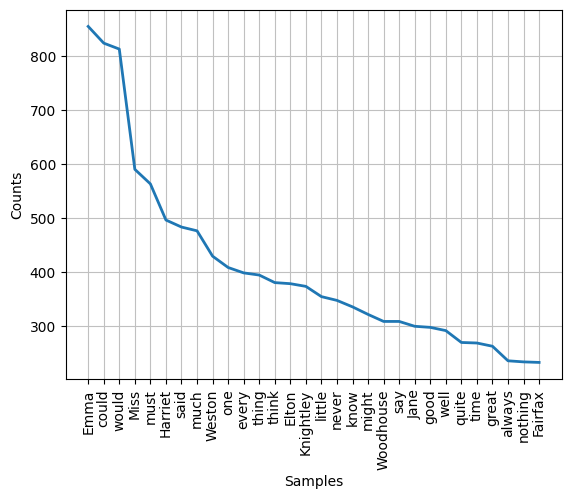

In [8]:
# Visualize the frequency distribution of the top 30 words
fdist_filtered.plot(30, cumulative=False)
plt.show()


8. Part-of-Speech (POS) Tagging

I perform POS tagging to identify the grammatical role of each word (e.g., nouns, verbs, adjectives). This gives me insight into the structure of the sentences in Emma.

In [9]:
# POS Tagging
pos_tags = nltk.pos_tag(words_filtered)
print("First 20 POS-tagged words:", pos_tags[:20])


First 20 POS-tagged words: [('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP'), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN'), ('rich', 'JJ'), ('comfortable', 'JJ'), ('home', 'NN'), ('happy', 'JJ'), ('disposition', 'NN'), ('seemed', 'VBD'), ('unite', 'JJ'), ('best', 'JJS'), ('blessings', 'NNS'), ('existence', 'NN')]


9. Named Entity Recognition (NER)

Finally, I perform Named Entity Recognition (NER) to identify and classify named entities (people, locations, organizations) in the text.

In [10]:
# Named Entity Recognition
named_entities = nltk.ne_chunk(pos_tags)
print("Named Entities:", named_entities[:20])


Named Entities: [Tree('PERSON', [('Emma', 'NNP')]), Tree('PERSON', [('Jane', 'NNP'), ('Austen', 'NNP')]), ('1816', 'CD'), Tree('ORGANIZATION', [('VOLUME', 'NNP')]), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), Tree('PERSON', [('Woodhouse', 'NNP')]), ('handsome', 'VBD'), ('clever', 'NN'), ('rich', 'JJ'), ('comfortable', 'JJ'), ('home', 'NN'), ('happy', 'JJ'), ('disposition', 'NN'), ('seemed', 'VBD'), ('unite', 'JJ'), ('best', 'JJS'), ('blessings', 'NNS'), ('existence', 'NN'), ('lived', 'VBD')]


Conclusion

In this notebook, I used NLTK to analyze Emma by Jane Austen. I explored various NLP tasks like tokenization, frequency analysis, bigram collocations, POS tagging, and named entity recognition. These techniques allowed me to extract meaningful insights from the text, showcasing the power of NLP for classic literary analysis.

